# Regression - Estimation of Data Scientist Salary

---

## 1.0 Objectives

- To predict data scientist annual salary

## 2.0 Dataset Information

### 2.1 Description

Amidst the pandemic many people lost their jobs, with this dataset it is possible to hone the job search so that more people in need can find employment.  
<br>
This dataset was created by [picklesueat](https://github.com/picklesueat/data_jobs_data) and contains more than 3900 job listing for data scientist positions, with features such as:  
- Salary Estimate  
- Location  
- Company Rating  
- Job Description  
- and more.

### 2.2 Data Dictionary

| Variable          | Definition                             |
|-------------------|----------------------------------------|
| ID                | id                                     |
| index             | Same as ID                             |
| Job Title         | Job title                              |
| Salary Estimate   | Salary estimate                        |
| Job Description   | Job description                        |
| Rating            | Company rating                         |
| Company Name      | Company name                           |
| Location          | Job location                           |
| Headquarters      | Company headquarters location          |
| Size              | Company size                           |
| Founded           | Year company was founded               |
| Type of ownership | Type of company ownership              |
| Industry          | Industry                               |
| Sector            | Sector within industry                 |
| Revenue           | Yearly revenue                         |
| Competitors       | Main competitor                        |
| Easy Apply        | Whether easy apply is available or not |

### 2.3 Acknowledgement & Source

Author of the Kaggle Dataset: [Larxel](https://www.kaggle.com/andrewmvd)  
Link to Kaggle Dataset: [Data Scientist Jobs](https://www.kaggle.com/andrewmvd/data-scientist-jobs)  
<br>
GitHub Repository Author: [picklesueat](https://github.com/picklesueat)  
Link to GitHub Repository: [data_jobs_data](https://github.com/picklesueat/data_jobs_data)

---

## 3.0 Import Library and Load Dataset

In [1]:
# Enable graph in jupyter notebook
%matplotlib inline

# Data Sanitisation
import re

# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Building Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('DataScientist.csv')

## 4.0 Setting Graph Style

In [4]:
plt.rcParams["figure.figsize"] = (6, 3)
plt.rcParams['figure.dpi'] = 150
sns.set_style("white")

## 5.0 Statistics Summary of Dataset

In [5]:
df.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3909.0,1954.000000,1128.575429,0.0,977.0,1954.0,2931.0,3908.0
index,3909.0,2167.446662,1247.657849,0.0,1121.0,2161.0,3249.0,4379.0
Rating,3909.0,3.283576,1.575749,-1.0,3.2,3.7,4.1,5.0
Founded,3909.0,1479.154771,855.750138,-1.0,1625.0,1976.0,2002.0,2020.0


An interesting outcome is being shown in the table above, feature *Rating* and *Founded* having a minimum value of -1 which is no logical at all. The normal range for feature *Rating* should between 0 and 5 while feature *year* shold show a appropriate year value.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

In [8]:
df['Salary Estimate'].nunique()

148

There are total of 148 unique category for feature category. The number of too category is not ideally to used classification method but preferly to use regression method to predict the salary.

## 6.0 Preprocessing

### 6.1 Data Cleaning

Since the dataset is not using `np.nan` to define missing value, converting the value -1 to `np.nan` is a necessary step before fixing missing value.

In [9]:
df = df.replace(-1, np.nan)
df = df.replace('-1', np.nan)
df = df.replace('Unknown', np.nan)

Find which variables contains missing value

In [10]:
def find_col_with_na(df):
    col_sum_na = df.isnull().sum()
    has_na = col_sum_na > 0
    col_with_na = df.columns[has_na]
    return col_with_na, has_na

def calculate_na_pct(df):
    col_sum_na = df.isnull().sum()
    has_na = col_sum_na > 0
    return (col_sum_na / len(df) * 100)[has_na].sort_values(ascending=False)

In [11]:
col_with_na, has_na = find_col_with_na(df)

print(col_with_na)

Index(['Rating', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'Easy Apply'],
      dtype='object')


Calculate the percentages of missing instances in the variable

In [12]:
calculate_na_pct(df)

Easy Apply           95.804554
Competitors          70.606293
Founded              24.993605
Industry             13.967767
Sector               13.967767
Rating               10.463034
Size                  7.828089
Type of ownership     6.830391
Headquarters          6.139678
Revenue               5.858276
dtype: float64

Feature *Easy Apply* and *Competitors* has 95.80% and 70.61% of missing data respectively. Having more than 50% missing data, these two feature should be remove from the dataset.

In [13]:
df = df.drop(['Easy Apply', 'Competitors'], axis=1)

In [14]:
calculate_na_pct(df)

Founded              24.993605
Industry             13.967767
Sector               13.967767
Rating               10.463034
Size                  7.828089
Type of ownership     6.830391
Headquarters          6.139678
Revenue               5.858276
dtype: float64

Since the model is build to predict revenue, feature *Revenue* is the dependant variables. For the instances having missing revenue, they will be removed as well.

In [15]:
df = df.dropna(subset=['Revenue'])

In [16]:
calculate_na_pct(df)

Founded              20.326087
Industry              8.614130
Sector                8.614130
Rating                4.891304
Size                  2.092391
Type of ownership     1.032609
Headquarters          0.298913
dtype: float64

Feature *Rating* and *Founded* missing value will be imputed with the median value while the rest of the features will be using the previous instances value.

In [17]:
replace_value = {'Founded': df['Founded'].median(),
                 'Rating': df['Rating'].median()}

df = df.fillna(value=replace_value)

In [18]:
df = df.fillna(method='ffill')

In [19]:
calculate_na_pct(df)

Series([], dtype: float64)

All missing value in the dataset had been handled.

### 6.2 Feature Selection

In [20]:
df.columns

Index(['Unnamed: 0', 'index', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector',
       'Revenue'],
      dtype='object')

In [21]:
df['Job Description'].nunique() / len(df) * 100

94.375

By referring to the data dictionary in section 2, the feature *Unnmaed: 0*, *index* don't possess any value to build the model because they are unique indentifier to identify the instances.  

As for the feature *Job Description*, there are 94.38% of it is unique. Having a high percentage of uniqueness also hardly contribute to training the model itself.  

For the feature *Company Name*, it is also an unique identifier to identify the company itself, as long the dataset having the feature *size* for representing the company, this will be an good indicator.  

Feature *Headquarters* also can be discard from training the model as dataset already contains feature *location*. Feature *Headquarters* and *Location* have a strong positive correlation. By having two feature to train the model will cause the model to drop in accuracy.  

Feature *Sector* is a subset of feature *Industry*. Being a subset to one another will also display a strong positive correlation. Feature *Sector* will be drop from training the model while feature *Industry* be remain.

Feature *Revenue* is the company annual revenue which also can be remove from training the model.  

In [22]:
df = df.drop(['Unnamed: 0', 'index', 'Job Description', 'Company Name', 'Headquarters', 'Sector', 'Revenue'], axis=1)

In [23]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Rating', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry'],
      dtype='object')

### 6.3 Feature Engineering

#### 6.3.1 Job Title

In [24]:
df['Job Title'].nunique() / len(df) * 100

54.37499999999999

The job title that each company offered is unique. Based on the information, there are 54.37% of different job title in the dataset. After all, the dataset is all about data scientist job, the different job title is just an indication of seniority of the position.  
The three most common work experience level is junior, intermediate and senior. Based on the job title given by the dataset, we will be assigning appropriate category to the instances.  

In [25]:
def assign_work_experience(title):
    senior_title_keyword = ['sr', 'senior', 'manager', 'vp', 'principal', 'lead', 
                            'director', 'head', 'supervisor', 'supervisory']
    junior_title_keyword = ['jr', 'junior', 'intern', 'internship', 'associate', 'entry']
    
    # Input Sanitisation
    title = title.lower()
    title = re.sub('[^a-zA-Z0-9 \n\.]', ' ', title)
    
    if any(keyword in title for keyword in senior_title_keyword):
        return 'Senior'
    elif any(keyword in title for keyword in junior_title_keyword):
        return 'Junior'
    else:
        return 'Intermediate'

In [26]:
df['Seniority'] = df['Job Title'].apply(assign_work_experience)
df['Seniority'].value_counts()

Intermediate    2525
Senior          1011
Junior           144
Name: Seniority, dtype: int64

In [27]:
df = df.drop(['Job Title'], axis=1)
df.columns

Index(['Salary Estimate', 'Rating', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Seniority'],
      dtype='object')

#### 6.3.2 Salary Estimate

The salary of the data scientist in the dataset is using a range estimation. However, the purpose of this project will need to use numerical data. Thus, the salary estimation for all the instances in the dataset will be using the average value of the range.

In [28]:
def convert_salary(text):
    is_per_hour = 'per hour' in text.lower()
    
    salary = re.sub('\D', ' ', text)
    low, high = salary.split()
    low, high = int(low), int(high)
    avg = (low + high) // 2

    if is_per_hour:
        daily_salary = 8 * avg
        monthly_salary = daily_salary * 30
        annual_salary = 12 * monthly_salary
        
        return annual_salary
    else:
        return avg * 1000

In [29]:
df['Annual Salary'] = df['Salary Estimate'].apply(convert_salary)
df = df.drop(['Salary Estimate'], axis=1)

#### 6.3.3 Location

The dataset feature *location* is subdivide by state. However, it will be better to generalise it by using country to represent the location

In [30]:
def convert_location(loc):
    loc = loc.split(',')[-1]
    if loc.isupper() and len(loc.strip()) == 2:
        return 'United States'
    
    return loc

In [31]:
df['Location'] = df['Location'].apply(convert_location)

### 6.4 Exploration Data

In [32]:
df.columns

Index(['Rating', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Seniority', 'Annual Salary'],
      dtype='object')

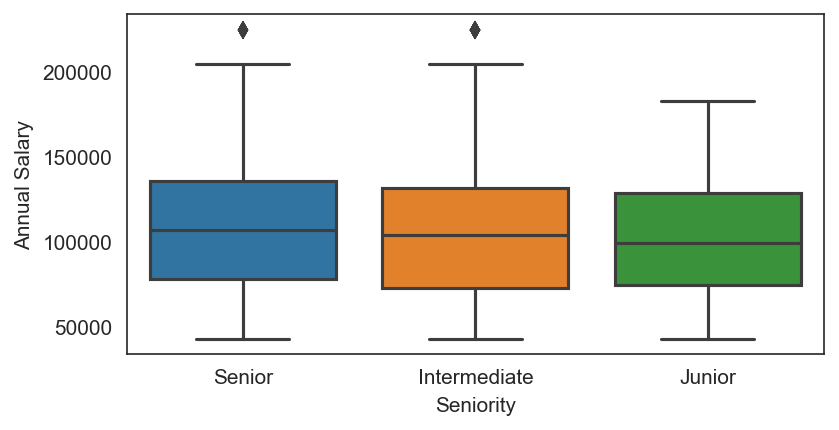

In [33]:
sns.boxplot(data=df, x='Seniority', y='Annual Salary')
plt.show()

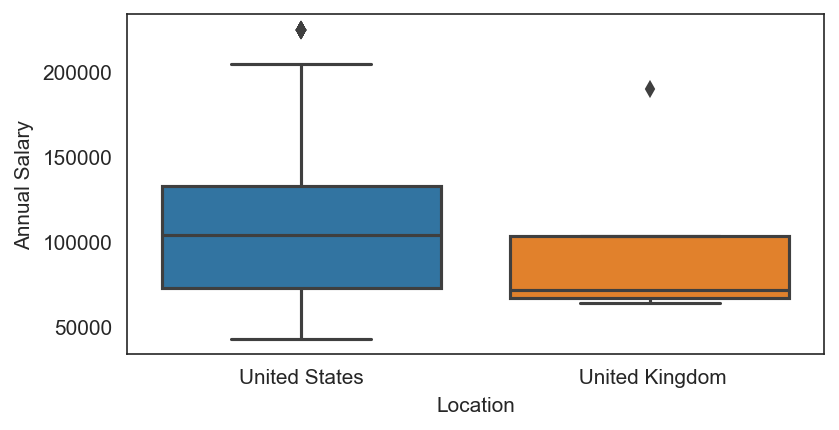

In [34]:
sns.boxplot(data=df, x='Location', y='Annual Salary')
plt.show()

In [35]:
df['Size'].unique()

array(['501 to 1000 employees', '1001 to 5000 employees',
       '1 to 50 employees', '201 to 500 employees', '51 to 200 employees',
       '10000+ employees', '5001 to 10000 employees'], dtype=object)

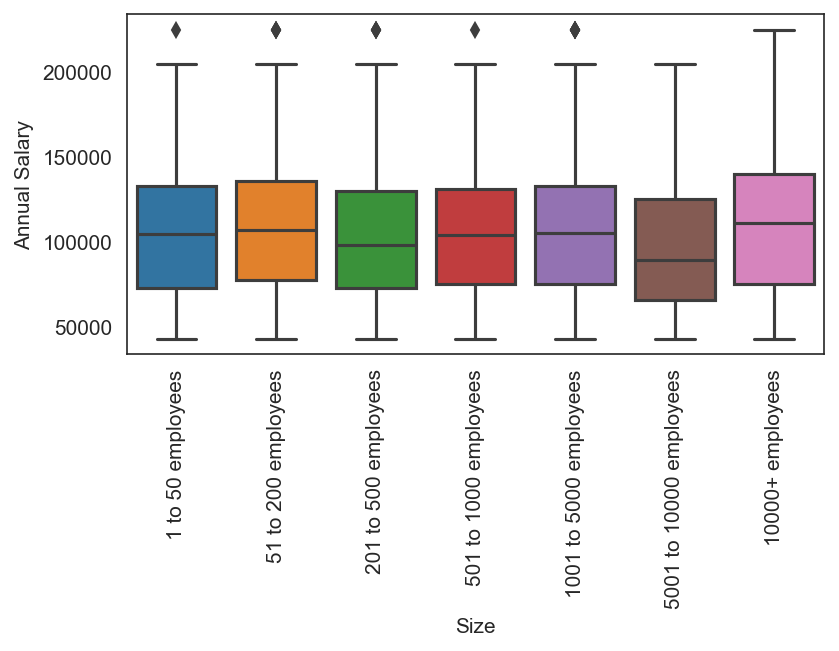

In [36]:
sns.boxplot(data=df, x='Size', y='Annual Salary',
            order=['1 to 50 employees', '51 to 200 employees', '201 to 500 employees',
                   '501 to 1000 employees', '1001 to 5000 employees', 
                   '5001 to 10000 employees', '10000+ employees'])

plt.xticks(rotation=90)
plt.show()

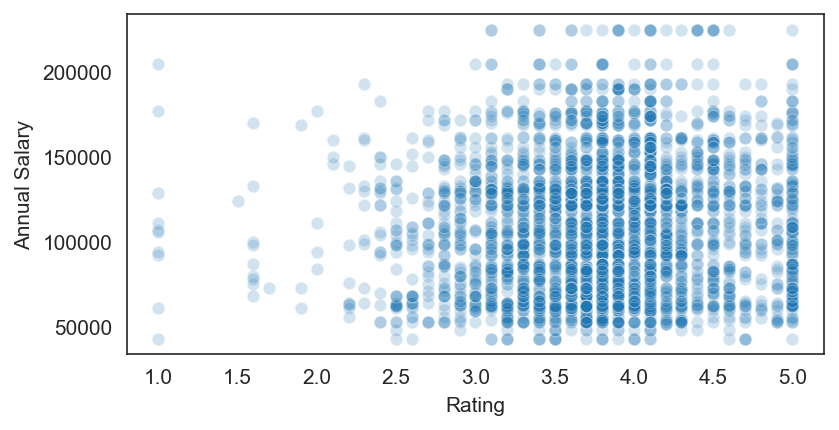

In [37]:
sns.scatterplot(data=df, x='Rating', y='Annual Salary', alpha=0.2)
plt.show()

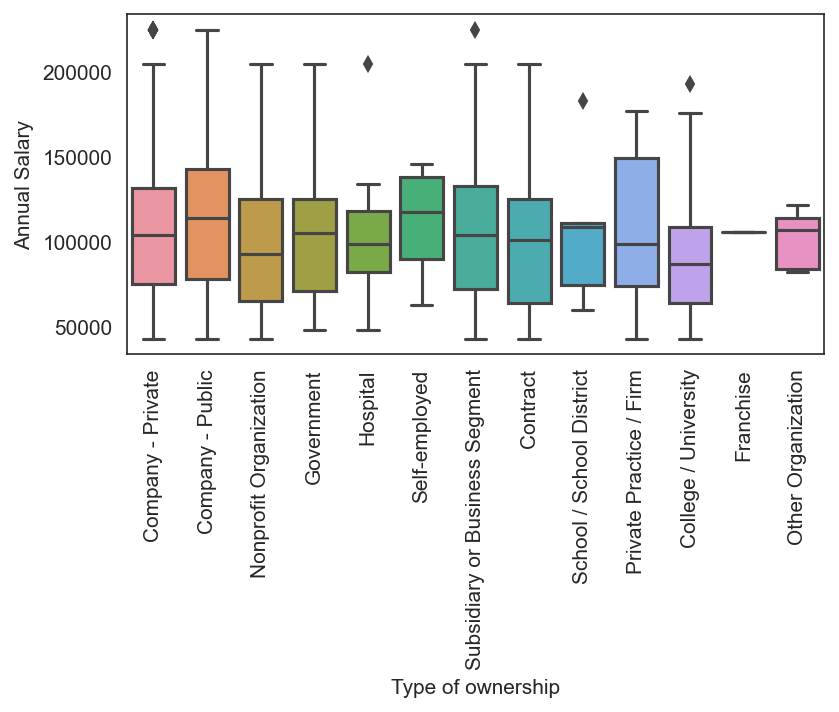

In [38]:
sns.boxplot(data=df, x='Type of ownership', y='Annual Salary')
plt.xticks(rotation=90)
plt.show()

### 6.5 Dealing with Categorical Data

In [39]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [40]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3680 entries, 0 to 3908
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rating         3680 non-null   float64
 1   Founded        3680 non-null   float64
 2   Annual Salary  3680 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 244.0 KB


In [41]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3680 entries, 0 to 3908
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Location           3680 non-null   object
 1   Size               3680 non-null   object
 2   Type of ownership  3680 non-null   object
 3   Industry           3680 non-null   object
 4   Seniority          3680 non-null   object
dtypes: object(5)
memory usage: 301.5+ KB


In [42]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [43]:
final_df = pd.concat([df_nums,df_objs],axis=1)

### 6.6 Feature Scaling

In [44]:
df = final_df.copy()

In [45]:
X = df.drop(['Annual Salary'], axis=1)
y = df['Annual Salary']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 7.0 Building Model

### 7.1 Finding Best Regression Model

By training different regression model as below, we will choose the model that produce the lowest mean squared error (MSE)

- Linear Regression
- Elastic Net Regression
- Support Vector Regression
- Random Forest Regressor

In [48]:
lin_reg = LinearRegression()
els_reg = ElasticNet(random_state=112)
svr_reg = SVR()
rfg_reg = RandomForestRegressor(random_state=112)

In [113]:
metrics = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE'])

for reg in (lin_reg, els_reg, svr_reg, rfg_reg):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    scores = cross_val_score(reg, X_train, y_train,
                            scoring='neg_mean_squared_error', cv=10)
    
    new_row = {
        'Model': reg.__class__.__name__,
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE':  mean_absolute_error(y_test, y_pred),
        'Cross Val Score': np.sqrt(-scores).mean()
    }
    metrics = metrics.append(new_row, ignore_index=True)

In [114]:
metrics

,Model,MSE,RMSE,MAE,Cross Val Score
0,LinearRegression,1.395664e+09,37358.589766,30239.485140,4.920975e+17
1,ElasticNet,1.373925e+09,37066.495049,30266.725239,3.732306e+04
2,SVR,1.488396e+09,38579.737286,31997.998473,3.862139e+04
3,RandomForestRegressor,1.423567e+09,37730.181993,30171.225222,3.912353e+04


With the metrics given, we can conclude the best model to train this dataset is using elastic net. It is because elastic net has the lowest cross val score and RMSE.

### 7.2 Fine Tune Model

In [51]:
base_elastic_model = ElasticNet(tol=0.01, random_state=112)

param_grid = {'alpha' :[0.1, 1, 5, 10, 50, 100],
              'l1_ratio': [.1, .5, .7, .9, .95, .99, 1]}

In [52]:
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=10,
                          verbose=1)

In [53]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


GridSearchCV(cv=10, estimator=ElasticNet(random_state=112, tol=0.01),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [54]:
grid_model.best_params_

{'alpha': 50, 'l1_ratio': 0.99}

The best parameters for elastic net is shown as above. Alpha being 50 and l1_ratio is 0.99.

In [55]:
y_pred = grid_model.predict(X_test)

In [56]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 30282.29347053025
MSE: 1372396036.1671455
RMSE: 37045.86395492951


# 8.0 Conclusion

In [57]:
df['Annual Salary'].nunique()

89

In conclusion, the model that we had built is poor on predicting the salary of the data scientist. With the RMSE of the model is 37045.86, meanings that a data scientist annual salary will be plus or minus 37045.86. In the perspective of monthly salart, it is a plus or minus of 3087.15 (37045.86 / 12). In reality, the model will hardly benefit an user. The ideal RMSE range is below 300.    
<br>

The suspected cause for having such low predictability is due to that the estimated salary is using a range based. We get the average of the range and make it numerical for the purpose of using a regression model. The predictability will be much stronger if we used back a classification model. However, having a 89 unique classes is not an option but rather we have to combine different classes together when using a classification method.